In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
g=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [7]:
g.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
g.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [16]:
g.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [18]:
g.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [19]:
g.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

UNIVARIATE  ANALYSIS

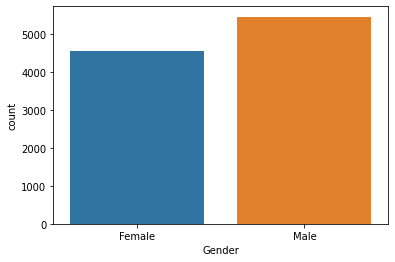

In [20]:
sns.countplot(x='Gender', data=g)
plt.show()

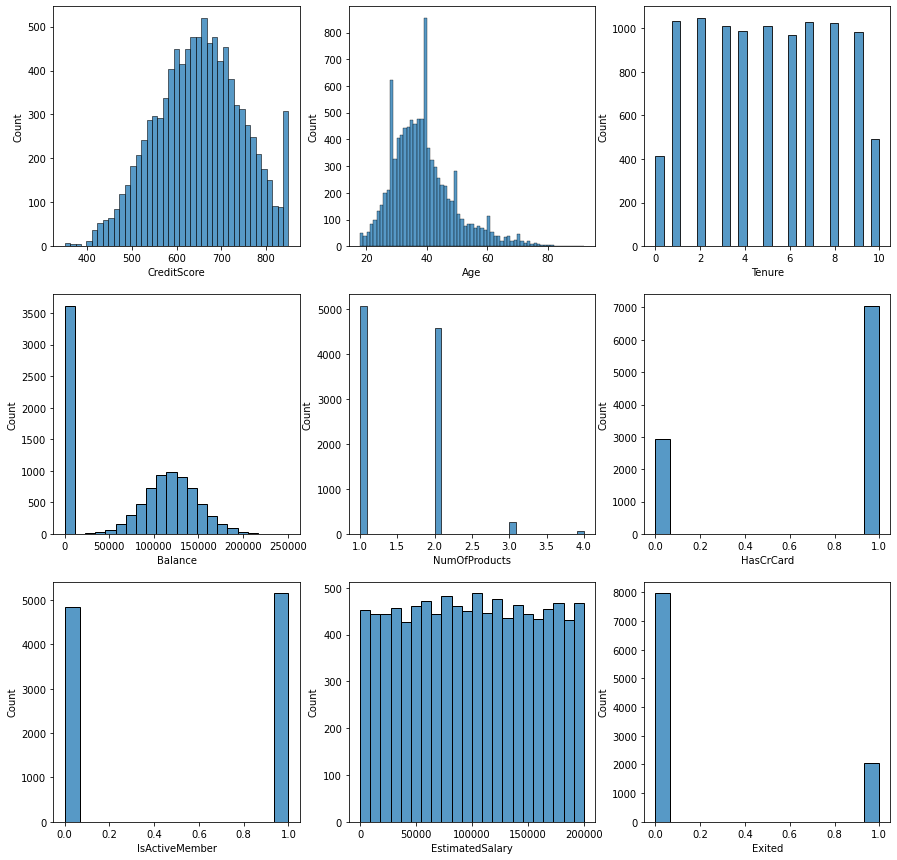

In [21]:
cols=3
rows=3
num=g.select_dtypes(exclude='object').columns
fig=plt.figure(figsize=(cols*5,rows*5))
for i, col in enumerate(num):
  ax=fig.add_subplot(rows,cols,i+1)
  sns.histplot(x=g[col],ax=ax)

BIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


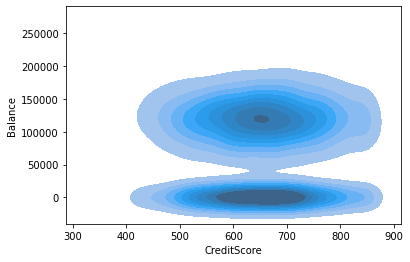

In [22]:
sns.kdeplot(g.CreditScore,g.Balance,'size',fill='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


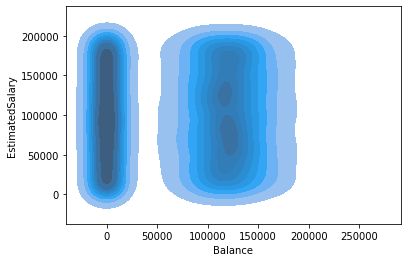

In [23]:
sns.kdeplot(g.Balance,g.EstimatedSalary,'size',fill='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


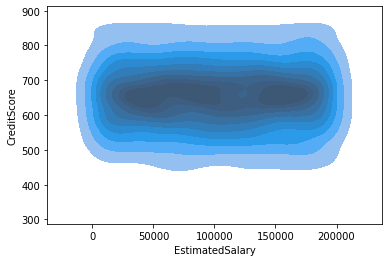

In [24]:
sns.kdeplot(g.EstimatedSalary,g.CreditScore,'size',fill='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


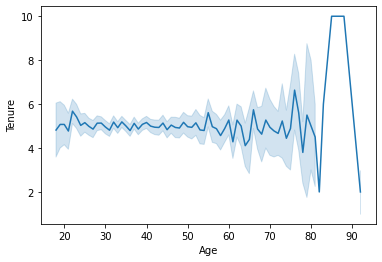

In [25]:
sns.lineplot(g.Age,g.Tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


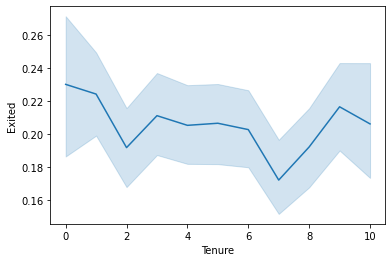

In [26]:
sns.lineplot(g.Tenure,g.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


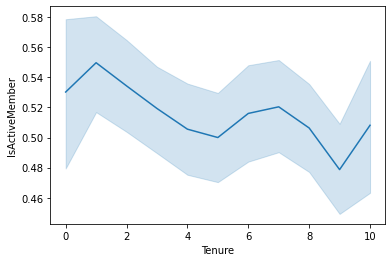

In [27]:
sns.lineplot(g.Tenure,g.IsActiveMember)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


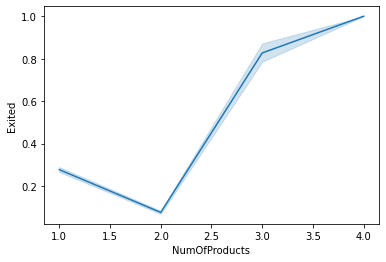

In [28]:
sns.lineplot(g.NumOfProducts,g.Exited)

MULTIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


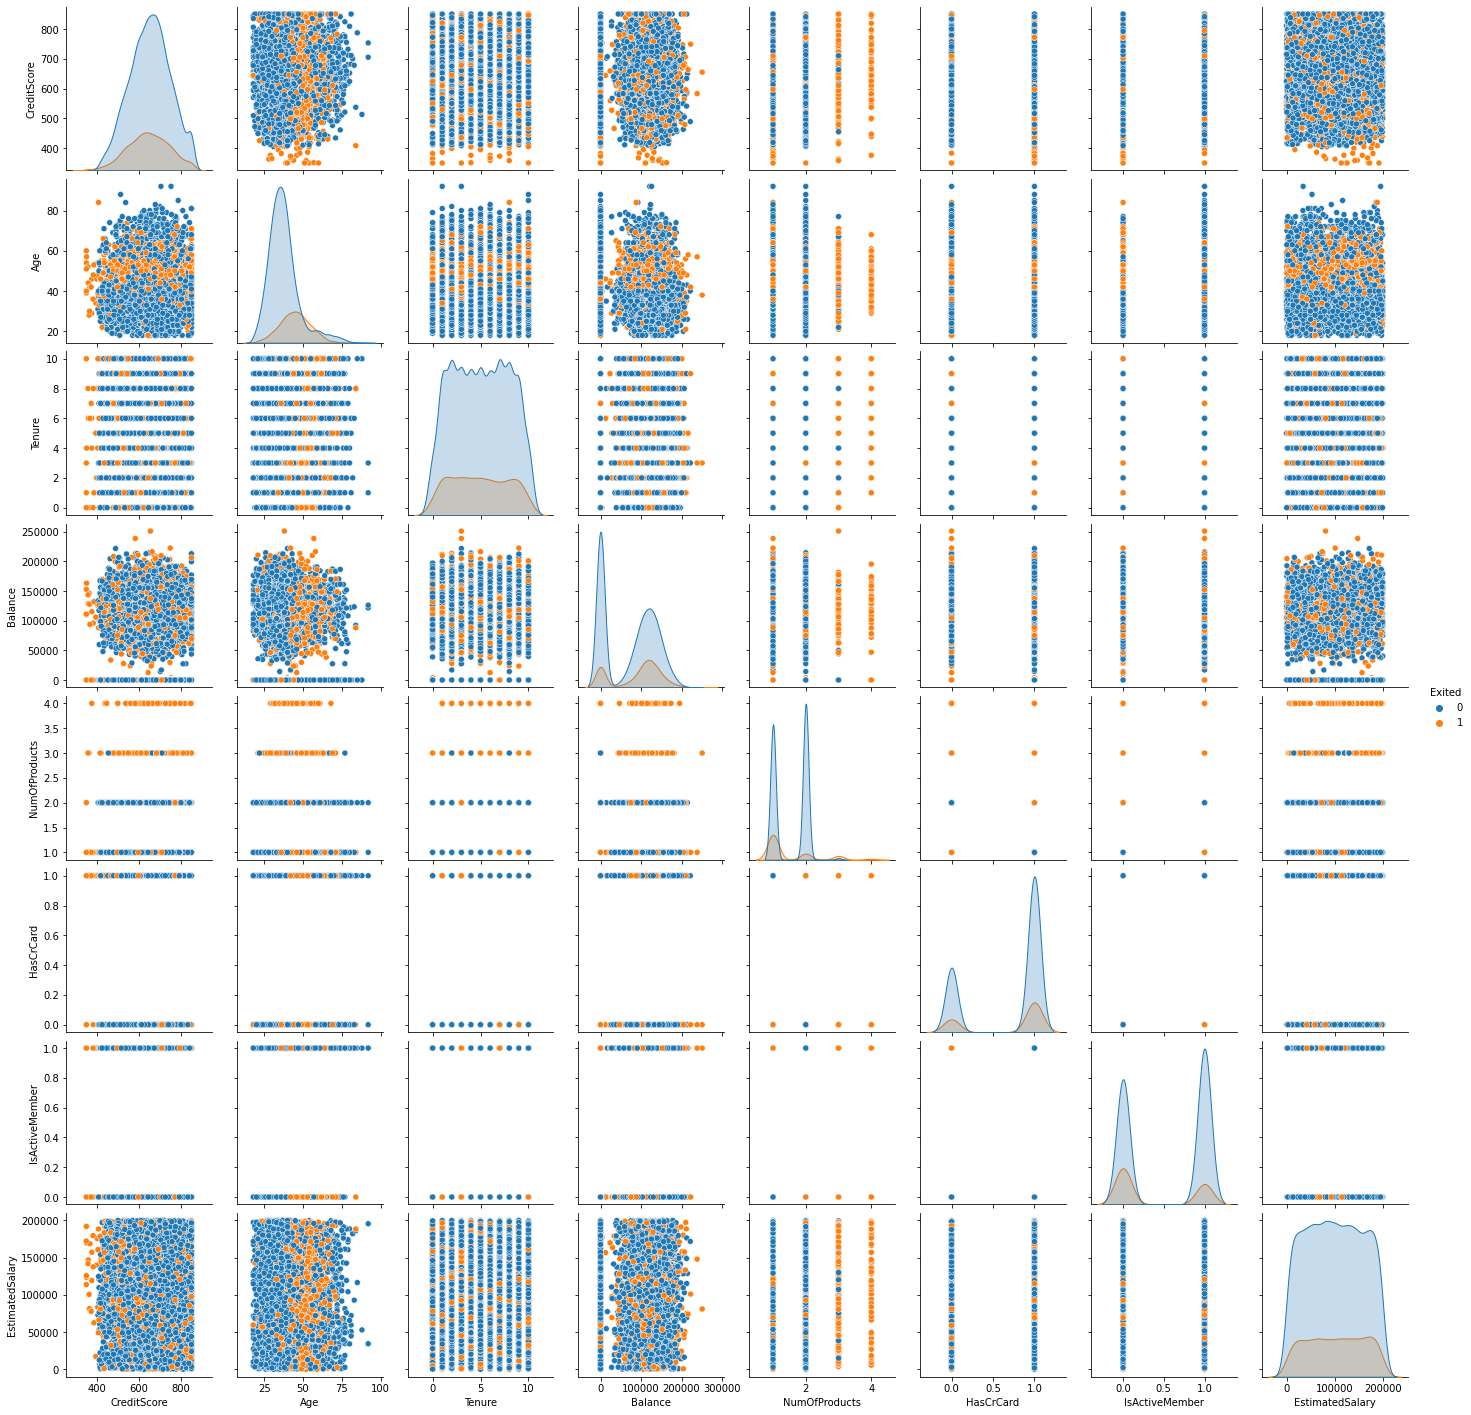

In [29]:
sns.pairplot(g,'Exited')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


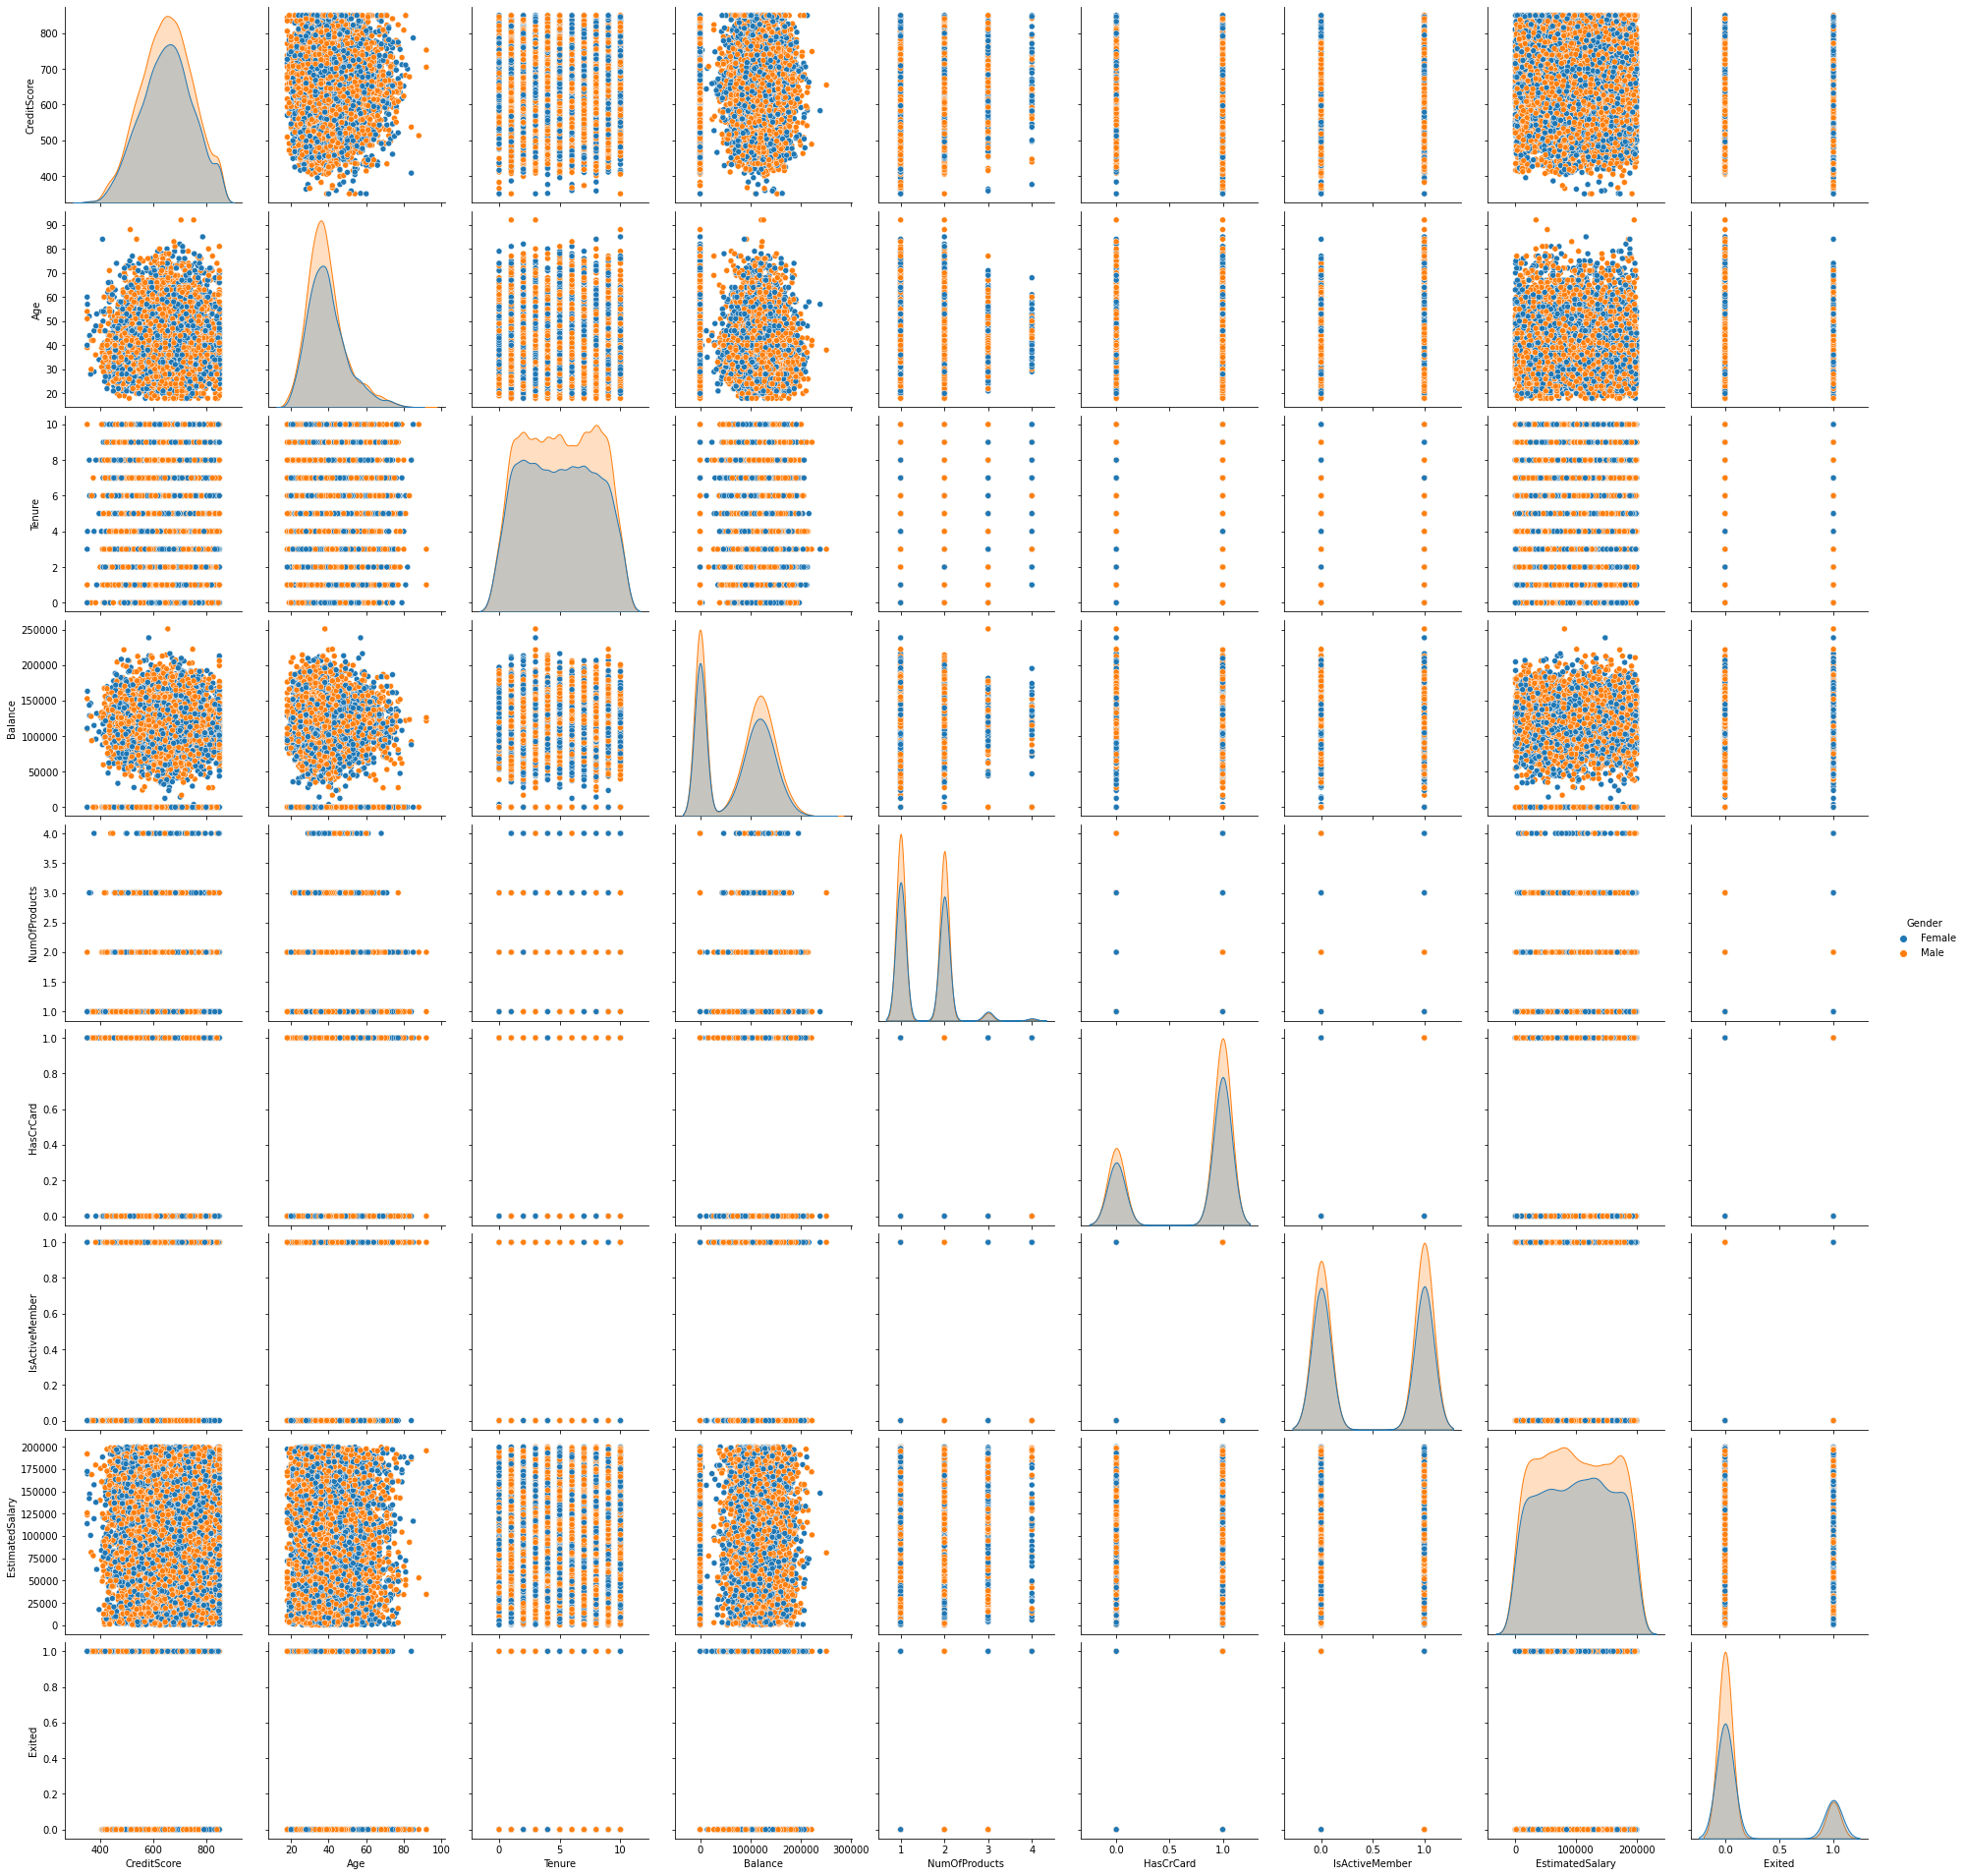

In [30]:
sns.pairplot(g,hue="Gender",size=3)

DESCRIPTIVE ANALYSIS

In [31]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [32]:
g.shape

(10000, 11)

In [33]:
g.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [34]:
g.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


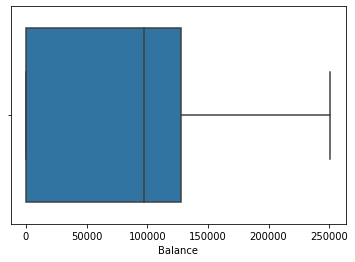

In [35]:
sns.boxplot(g['Balance'])

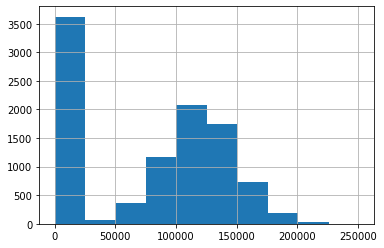

In [36]:
g['Balance'].hist()

In [37]:
index = g[(g['Balance'] == 0.0)].index
g.drop(index, inplace=True)

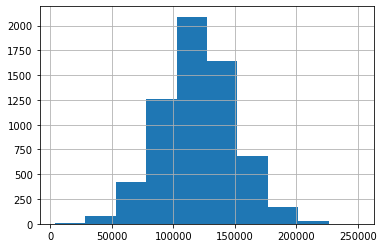

In [38]:
g['Balance'].hist()

LABEL ENCODING

In [39]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [40]:
le = LabelEncoder()

In [41]:
g['Geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [42]:
g['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [43]:
g['Geography']=le.fit_transform(g['Geography'])

In [44]:
count(g['Geography'])

Counter({2: 1278, 0: 2596, 1: 2509})

In [45]:
g['Gender']=le.fit_transform(g['Gender'])

In [46]:
count(g['Gender'])

Counter({0: 2889, 1: 3494})

SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [47]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6383 non-null   int64  
 1   Geography        6383 non-null   int64  
 2   Gender           6383 non-null   int64  
 3   Age              6383 non-null   int64  
 4   Tenure           6383 non-null   int64  
 5   Balance          6383 non-null   float64
 6   NumOfProducts    6383 non-null   int64  
 7   HasCrCard        6383 non-null   int64  
 8   IsActiveMember   6383 non-null   int64  
 9   EstimatedSalary  6383 non-null   float64
 10  Exited           6383 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 598.4 KB


In [48]:
x=g.iloc[:,0:10]
y=g['Exited']

In [49]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
7,376,1,0,29,4,115046.74,4,1,0,119346.88
...,...,...,...,...,...,...,...,...,...,...
9991,597,0,0,53,4,88381.21,1,1,0,69384.71
9993,644,0,1,28,7,155060.41,1,1,0,29179.52
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [50]:
y

1       0
2       1
4       0
5       1
7       1
       ..
9991    1
9993    0
9996    0
9998    1
9999    0
Name: Exited, Length: 6383, dtype: int64

SPLIT DATA INTO TRAINING AND TESTING

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

SCALE THE INDEPENDENT VARIABLE

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
st = StandardScaler()

In [55]:
s_xtrain = st.fit_transform(xtrain)
s_xtrain

array([[ 1.6007569 ,  0.28265666, -1.09837141, ...,  0.66359706,
        -1.02584874,  1.43498481],
       [ 0.36711628, -1.05093358, -1.09837141, ..., -1.50693856,
         0.97480258, -0.65854089],
       [ 1.06168705,  1.6162469 ,  0.91043885, ..., -1.50693856,
         0.97480258, -1.70200861],
       ...,
       [ 0.71958503, -1.05093358, -1.09837141, ...,  0.66359706,
        -1.02584874, -0.61165517],
       [-1.44706111,  1.6162469 , -1.09837141, ...,  0.66359706,
         0.97480258, -1.43548524],
       [-0.7006567 , -1.05093358, -1.09837141, ...,  0.66359706,
         0.97480258,  0.10055912]])

In [56]:
s_xtest = st.transform(xtest)
s_xtest

array([[ 0.64701793,  1.6162469 , -1.09837141, ...,  0.66359706,
         0.97480258, -0.89500444],
       [-0.19268703, -1.05093358, -1.09837141, ...,  0.66359706,
         0.97480258, -1.58417773],
       [-1.70622931,  1.6162469 ,  0.91043885, ...,  0.66359706,
         0.97480258, -0.83522867],
       ...,
       [-0.00608593, -1.05093358, -1.09837141, ...,  0.66359706,
         0.97480258, -0.23113949],
       [ 1.47635617, -1.05093358, -1.09837141, ...,  0.66359706,
        -1.02584874,  1.2733671 ],
       [ 1.89102528,  0.28265666, -1.09837141, ..., -1.50693856,
         0.97480258, -0.1348482 ]])

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()
model.add(Dense(10, activation='relu')) # Input
model.add(Dense(18, activation='relu')) # 1st hid. layer
model.add(Dense(9, activation='relu')) # 2nd hid. layer
model.add(Dense(8, activation='relu')) # 3rd hid. layer
model.add(Dense(1,activation='linear')) # output layer

In [59]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [60]:
history= model.fit(s_xtrain,ytrain,batch_size=10,epochs=300)

Epoch 1/300
447/447 [==============================] - 2s 2ms/step - loss: 0.1698 - mse: 0.1698
Epoch 2/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1498 - mse: 0.1498
Epoch 3/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1405 - mse: 0.1405
Epoch 4/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1351 - mse: 0.1351
Epoch 5/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1316 - mse: 0.1316
Epoch 6/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1302 - mse: 0.1302
Epoch 7/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1280 - mse: 0.1280
Epoch 8/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 9/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1249 - mse: 0.1249
Epoch 10/300
447/447 [==============================] - 1s 2ms/step - loss: 0.1243 - mse: 0.1243
Epoch 11/300
447/447 [=================

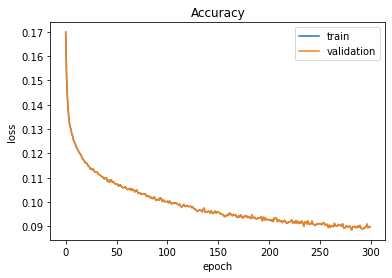

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.title('Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()